In [15]:
import tensorflow as tf
from keras import backend as K
from keras.models import load_model
import cv2
from faceblurring.utils import *

In [16]:
net_h, net_w = 800, 800 # a multiple of 32, the smaller the faster
obj_thresh, nms_thresh = 0.5, 0.45

In [17]:
model = load_model("./weights/YOLO_Face.h5", compile=False)

In [18]:
anchors = [[116,90, 156,198, 373,326], [30,61, 62,45, 59,119], [10,13, 16,30, 33,23]]

In [19]:
import os
image_path = os.path.abspath(r"C:\Users\MB\Desktop\f0041663.jpg")

In [20]:
image = cv2.imread(image_path)

In [21]:
proc_image = preprocess_input(image, net_h, net_w)

In [22]:
# make the prediction
yhat = model.predict_on_batch(proc_image)

In [23]:
boxes = list()
for i in range(len(yhat)):
    boxes += decode_netout(yhat[i][0], anchors[i], 0.6, net_h, net_w)

In [24]:
correct_yolo_boxes(boxes, image.shape[0], image.shape[1], net_h, net_w)

In [25]:
do_nms(boxes, 0.5)

In [26]:
out_boxes = list()
out_conf = list()
for box in boxes:
    if box.classes[0]>0.5: # CONF_THRESH
        out_boxes.append(box)
        out_conf.append(box.classes[0])

In [29]:
for i in range(len(out_boxes)):
    box = out_boxes[i]
    conf = out_conf[i]
    y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
    print(f"y1:{y1}; y2:{y2}; x1:{x1}; x2:{x2}")


y1:364; y2:537; x1:1616; x2:1721
y1:401; y2:442; x1:187; x2:217


In [37]:
roi = image[401:442, 187:217]

In [39]:
blur = cv2.GaussianBlur(roi, (101,101),0)

In [40]:
image[401:442, 187:217] = blur

In [41]:
post_process(image, out_boxes, out_conf, debug = True)

In [60]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
def draw_boxes(filename, v_boxes, v_scores):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for i in range(len(v_boxes)):
		box = v_boxes[i]
		# get coordinates
		y1, x1, y2, x2 = box.ymin, box.xmin, box.ymax, box.xmax
		# calculate width and height of the box
		width, height = x2 - x1, y2 - y1
		# create the shape
		rect = Rectangle((x1, y1), width, height, fill=False, color='white')
		# draw the box
		ax.add_patch(rect)
		# draw text and score in top left corner
		label = "%.3f" % (v_scores[i])
		pyplot.text(x1, y1, label, color='white')
	# show the plot
	pyplot.show()

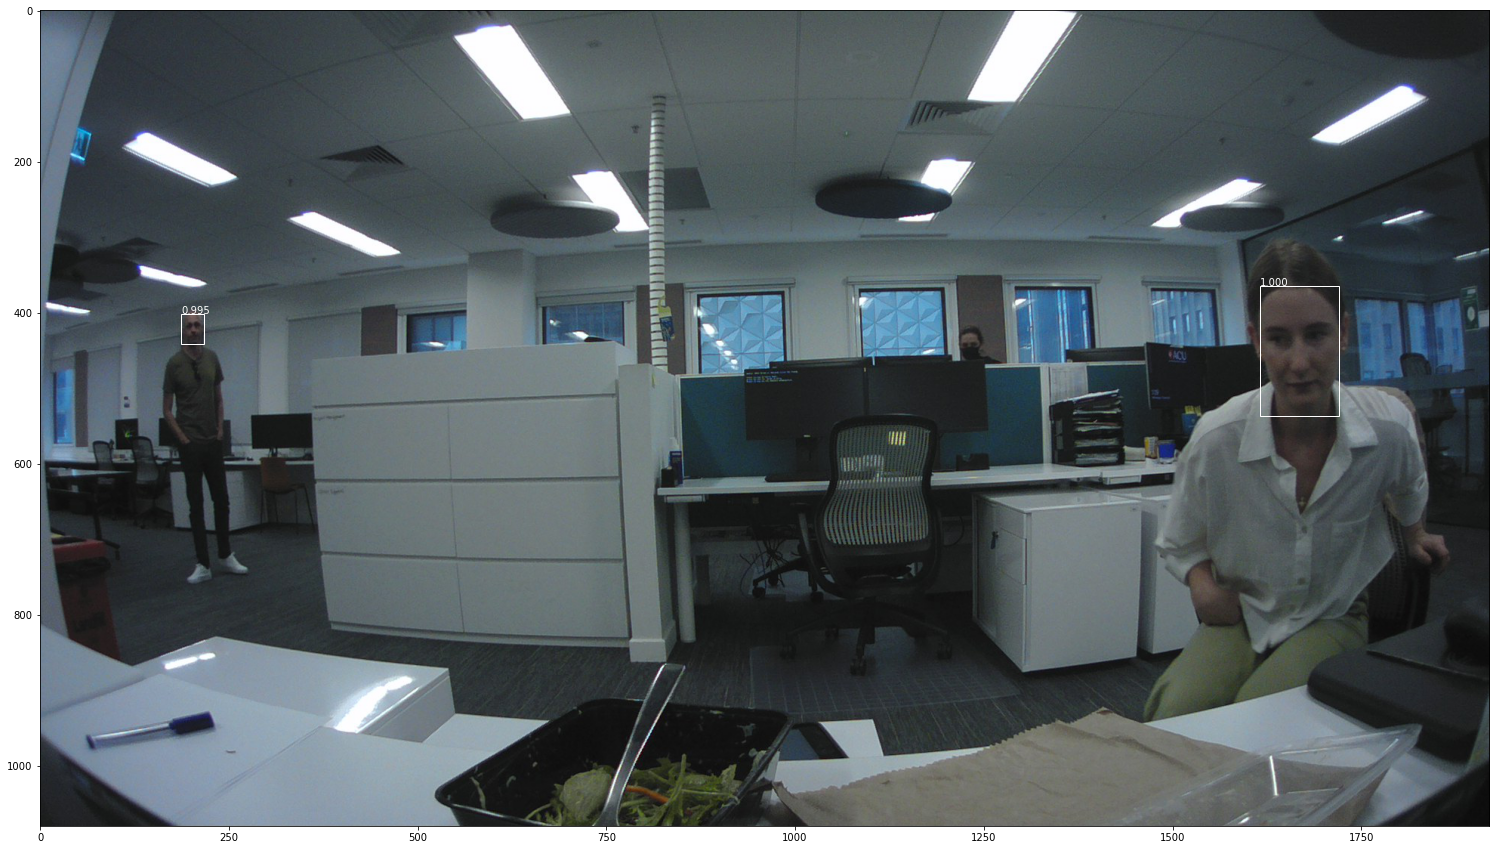

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [30, 15]
draw_boxes(image_path, out_boxes, out_conf, )

In [31]:
# Test reading in a video file with CV2

In [42]:
video_path = r"C:\Users\MB\Desktop\DCIM\130TLC00\TLC00003.AVI"

In [43]:
video = cv2.VideoCapture(video_path)
video.set(cv2.CAP_PROP_FPS, 1/60)

frame_num = 0

while video.isOpened():
    success, frame = video.read()
    
    if success:
        cv2.imwrite(f"C:/Users/MB/Desktop/DCIM/130TLC00/testout/frame_{frame_num}.jpg", frame)
        frame_num +=1
        
    else:
        break